In [1]:
!pip install qiskit==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00


In [2]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4569989975a89ea884e6c75e03eafb970b16aedce8e37c8674d9333c9fa5b62d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [3]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.2 MB/s eta 0:00:00


In [4]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

# 2-Qubit Grover's Algorithm Overview

### **Initial State Preparation**
For a 2-qubit system, we have \( N = 4 \) possible basis states. The uniform superposition state \( |s\rangle \) is:

$$
|s\rangle = \frac{1}{2} \left( |HH\rangle + |HV\rangle + |VH\rangle + |VV\rangle \right)
$$

---

### **Oracle \( U_f \): Marking the Winning State**

We define the *winning state* as:

$$
|w\rangle = |VH\rangle
$$

The oracle flips the sign of this state:

$$
U_f |s\rangle = \frac{1}{2} \left( |HH\rangle + |HV\rangle - |VH\rangle + |VV\rangle \right)
$$

**Qiskit Implementation:**
To implement this oracle in Qiskit:

1. Apply an **X gate** on the **first qubit** (to map \( |V\rangle \rightarrow |H\rangle \)).
2. Apply a **controlled-Z (CZ)** gate to flip the phase of the target state.
3. Apply another **X gate** on the **first qubit** to revert the mapping.

---

### **Diffusion Operator \( U_s \): Reflection About the Mean**

The diffusion operator reflects about the mean:

$$
U_s = 2|s\rangle\langle s| - I
$$

Where

$$
|s\rangle\langle s| = \frac{1}{4}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
\end{bmatrix}
$$

So,

$$
U_s = 2 \cdot \frac{1}{4}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
\end{bmatrix}
- I
$$

**Qiskit Implementation:**
This reflection is implemented with the following sequence:

1. Apply **H gates** on both qubits.
2. Apply **Z gates** on both qubits.
3. Apply a **CZ gate** between the two qubits.
4. Apply **H gates** on both qubits again.

---

### **Note on Perceval Implementation**

When implementing this circuit in **Perceval**, the **phase flip operation** includes an **additional Hadamard contribution**, due to how it models linear optics. This needs to be **accounted for in the Qiskit simulation**, similar to how we constructed the Bell state $$ |\psi^+\rangle $$.

---

### **Final Qiskit Circuit Composition**

1. **Initialize** in \( |00\rangle \)
2. Apply **H gates** to create \( |s\rangle \)
3. Apply the **Oracle \( U_f \)** (marking \( |VH\rangle \))
4. Apply the **Diffusion operator \( U_s \)** (reflection)
5. **Measure**

---


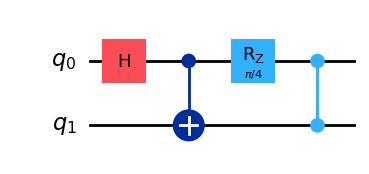

In [5]:
# Define a custom subroutine for a black box operation
def black_box_subroutine(qc, q0, q1):
    qc.h(q0)  # Example operation (Hadamard)
    qc.cx(q0, q1)  # Example operation (CNOT)
    qc.rz(np.pi/4, q0)  # Example phase shift
    qc.cz(q0, q1)  # Controlled-Z gate as part of the black box

# Create a circuit and apply the subroutine
qc = QuantumCircuit(2)
black_box_subroutine(qc, 0, 1)

# Draw the circuit with the custom black box operations
qc.draw('mpl')

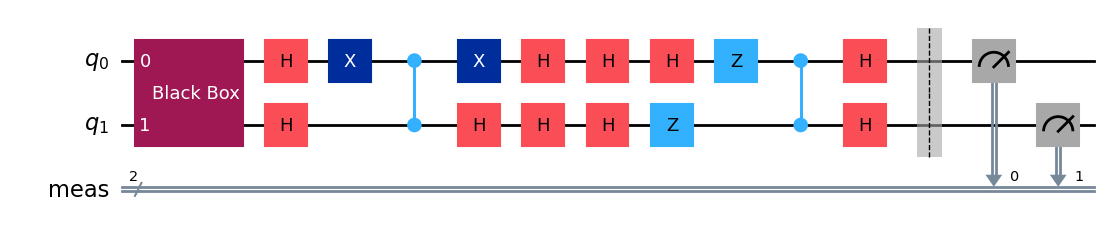

In [6]:
from qiskit.circuit import Gate

# Create a black box circuit
black_box_circuit = QuantumCircuit(2)
black_box_subroutine(black_box_circuit, 0, 1)

# Convert to a gate
black_box_gate = black_box_circuit.to_gate(label='Black Box')

# Apply in a larger circuit
qc = QuantumCircuit(2)
qc.append(black_box_gate, [0, 1])
qc.h(0)
qc.h(1)
qc.x(0)
qc.cz(0,1)
qc.x(0)
qc.h(1)
qc.h(0)
qc.h(1)
qc.h(0)
qc.h(1)
qc.h(0)
qc.z(1)
qc.z(0)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')

This circuit can be simplified to the one given below.

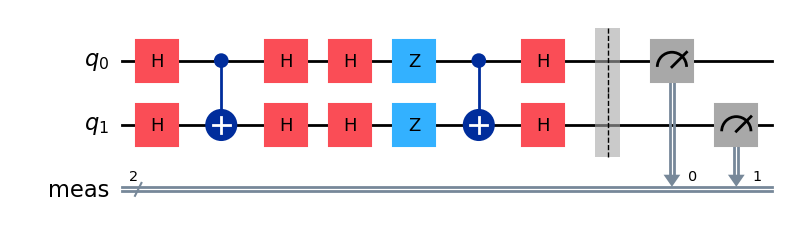

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

qc.cx(0,1)
# qc.x(0)
# qc.cz(0,1)
# qc.x(0)

qc.h(0)
qc.h(1)

qc.h(0) # contribution from PS
qc.z(0)
qc.h(1) # contribution from PS
qc.z(1)

qc.cx(0,1)
#qc.cz(0,1)

qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')


By replacing the CZ operations with CNOTs, we no longer needed to cancel out the extra Hadamard contributions from the Perceval phase shifter, reducing the overall number of components needed.


As we can see, the circuit is clearly balanced, meaning that the interference effects of the beamsplitters do not skew the outcomes of measurement. Therefore, the Black Box operator simply behaves as an identity gate.

We can now implement use the Qiskit Aer simulator to obtain the outcomes of measurement

In [12]:
qc_aer = transpile(qc, backend=AerSimulator())
simulator_aer = AerSimulator()
results = simulator_aer.run(qc_aer, shots=10000).result()
counts=results.get_counts()
print(counts)

{'10': 10000}


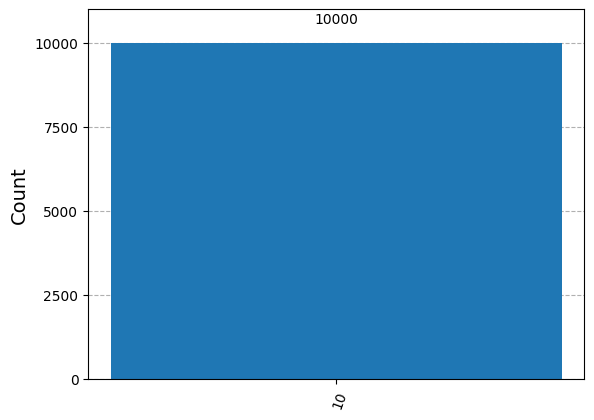

In [14]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

We can clearly see that the winning state was observed with 100% accuracy.

# Grover's Algorithm With Noise

To more accurately simulate the implementation of Grover's algorithm in a lab setting, we can inject dephasing noise into our circuit. We will use an RZ gate to accomplish this.

In [21]:
def create_grovers_with_noise(phase_noise):
    # Initialize a 2-qubit circuit
    qc = QuantumCircuit(2, 2)

    # Add phase noise as a phase shift to each qubit
    qc.h(0)
    qc.h(1)

    qc.rz(phase_noise, 0)
    qc.rz(phase_noise, 1)

    qc.cx(0,1)

    qc.h(0)
    qc.h(1)

    qc.h(0) # contribution from PS
    qc.z(0)
    qc.h(1) # contribution from PS
    qc.z(1)

    qc.cx(0,1)
    #qc.cz(0,1)

    qc.h(0)
    qc.h(1)

    # Measure the qubits
    qc.measure([0, 1], [0, 1])
    return qc

In [16]:
def simulate_circuit_with_noise(phase_noise, shots=10000):
  qc = create_grovers_with_noise(phase_noise)
  qc_aer = transpile(qc, backend=AerSimulator())
  simulator_aer = AerSimulator()
  results = simulator_aer.run(qc_aer, shots=shots).result()
  counts=results.get_counts()
  return counts

In [17]:
print(simulate_circuit_with_noise(np.pi/12))

{'01': 2, '11': 153, '00': 171, '10': 9674}


In [18]:
print(simulate_circuit_with_noise(np.pi/6))

{'01': 54, '11': 615, '00': 636, '10': 8695}


Now, we can construct a simple linear regression model to predict the accuracy for a given noise level.

In [19]:
noise_levels = np.linspace(0, np.pi/6, 50)  # Noise levels from 0 to pi/6
results = []

for noise in noise_levels:
    counts = simulate_circuit_with_noise(phase_noise=noise)
    marked_count = counts.get('10', 0)
    accuracy = marked_count / 10000  # Normalize to get accuracy
    results.append((noise, accuracy))

# Prepare the data for ML training
X = np.array([x[0] for x in results]).reshape(-1, 1)  # Noise levels
y = np.array([x[1] for x in results])  # Accuracy

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict accuracy for a new noise level
new_noise_level = np.pi / 16
predicted_accuracy = model.predict([[new_noise_level]])
print(f"Predicted accuracy for noise level {new_noise_level:.3f}: {predicted_accuracy[0]:.3f}")


Mean Squared Error: 0.00010410636684115059
R-squared: 0.9256805706118467
Predicted accuracy for noise level 0.196: 0.971


The results can be summarized below with the following plot.

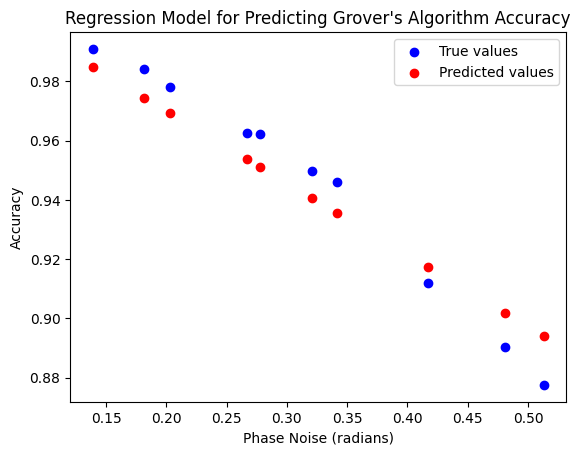

In [22]:
import matplotlib.pyplot as plt

# Plot the true vs predicted values
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Phase Noise (radians)')
plt.ylabel('Accuracy')
plt.title('Regression Model for Predicting Grover\'s Algorithm Accuracy')
plt.legend()
plt.show()
